#Coding

In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

df2 = df.filter(['encounter_id','patient_nbr','race','gender','age','weight','time_in_hospital','medical_specialty','A1Cresult','diabetesMed','readmitted'])
df2.rename(columns={'encounter_id':'Encounter #','patient_nbr':'Patient ID','race':'Race','gender':'Gender','age':'Age','weight':'Weight','time_in_hospital':'Time in Hospital(Days)','medical_specialty':'Visit Type','A1Cresult':'A1C Results','diabetesMed':'On Diabetes Meds','readmitted':'Readmission'}, inplace=True)
display(df2)

,Encounter #,Patient ID,Race,Gender,Age,Weight,Time in Hospital(Days),Visit Type,A1C Results,On Diabetes Meds,Readmission
0,2278392,8222157,Caucasian,Female,[0-10),?,1,Pediatrics-Endocrinology,None,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,3,?,None,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,?,None,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,2,?,None,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,?,None,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,3,?,>8,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,5,?,None,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,?,None,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,10,Surgery-General,None,Yes,NO


In [ ]:
df3 = df2.drop_duplicates(subset='Patient ID')

df3['Race'].replace({"?":"Other"}, inplace=True)


In [10]:
df3_race = df3.reset_index().groupby(['Race']).size().to_frame('count')

df3_race['percentage'] = round(df3_race['count'].div(71518).mul(100),2)
print (df3_race)


                 count  percentage
Race                              
AfricanAmerican  12887       18.02
Asian              497        0.69
Caucasian        53491       74.79
Hispanic          1517        2.12
Other             3126        4.37


,count,percentage
Race,,
AfricanAmerican,12887,18.02
Asian,497,0.69
Caucasian,53491,74.79
Hispanic,1517,2.12
Other,3126,4.37


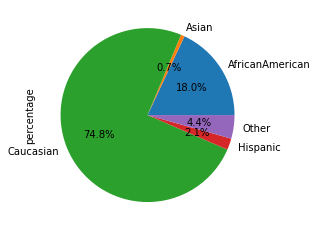

In [29]:
display(df3_race)

#df3_race['count'].plot(kind = 'bar')

df3_race['percentage'].plot.pie(autopct="%.1f%%")

In [31]:
df3_gender = df3.reset_index().groupby(['Gender']).size().to_frame('count')

df3_gender['percentage'] = round(df3_gender['count'].div(71518).mul(100),2)
print (df3_gender)

                 count  percentage
Gender                            
Female           38025       53.17
Male             33490       46.83
Unknown/Invalid      3        0.00


In [36]:
df3_age = df3.reset_index().groupby(['Age']).size().to_frame('count')

df3_age['percentage'] = round(df3_age['count'].div(71518).mul(100),2)
print (df3_age)

          count  percentage
Age                        
[0-10)      154        0.22
[10-20)     535        0.75
[20-30)    1127        1.58
[30-40)    2699        3.77
[40-50)    6878        9.62
[50-60)   12466       17.43
[60-70)   15960       22.32
[70-80)   18210       25.46
[80-90)   11589       16.20
[90-100)   1900        2.66


In [80]:
df2['Visit Type'].replace({"?":"Family/GeneralPractice"}, inplace=True)

df2_visit = df2.groupby('Visit Type')['Encounter #'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
display (df2_visit)

,Visit Type,count
11,Family/GeneralPractice,57389
18,InternalMedicine,14635
8,Emergency/Trauma,7565
3,Cardiology,5352
62,Surgery-General,3099
19,Nephrology,1613
27,Orthopedics,1400
28,Orthopedics-Reconstructive,1233
52,Radiologist,1140
51,Pulmonology,871


In [ ]:
df2['Time in Hospital(Days)'].mean()

4.395986871843248

#Writing

## Demographics

With CDC's data for hospital visits for diabetic patients, roughly 53% of the patients are male and 47% are female. The data includes age group between 0-100, with the highest at 47% between 60-80 year old. The census for hospital visits has 75% caucasians for diabetic patients.


In [ ]:
df3_gender['percentage'].plot.pie(autopct="%.1f%%")

In [ ]:
df3_race['percentage'].plot.pie(autopct="%.1f%%")

In [ ]:
df3_age['percentage'].plot.pie(autopct="%.1f%%")

Of the data, the visits for the hospital was mainly 70% for General and Internal Medicine, with the assumption that all visit with no type were considered a general visit. See below for top 10 visits type:

In [ ]:
display (df2_visit)

With the average hospital stay at 4.5 days. 

In [ ]:
df2['Time in Hospital(Days)'].mean()